In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
class GaussianMixture():
    def __init__(self, weights, means, covariances):
        self.ndim = len(means[0])
        self.n_components = len(means)
        self.means = means
        self.covariances = covariances
        self.weights = weights
    
    def pdf(self, x):
        values = [stats.multivariate_normal(
                    mean=self.means[i], cov=self.covariances[i]).pdf(x)
                  for i in range(self.n_components)]

        return np.average(np.array(values), weights=self.weights)
    
    def sample(self, n):
        indexes = np.random.choice(
                self.n_components, size=n, p=self.weights)

        samples_list = [stats.multivariate_normal(
                            self.means[i], cov=self.covariances[i]).rvs() 
                        for i in indexes]
        return np.array(samples_list)


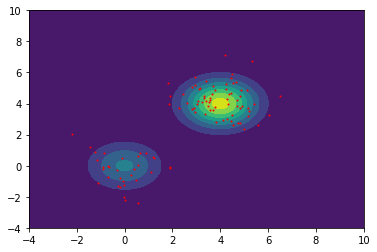

In [3]:
p1 = np.array([0, 0])
s1 = np.eye(2)
p2 = np.array([4, 4])
s2 = np.eye(2)
w = np.array([0.3, 0.7])

g = GaussianMixture(w, [p1, p2], [s1, s2])
sample = g.sample(100)


x = np.linspace(-4, 10, 100)
X, Y = np.meshgrid(x, x)
Z = np.array([
        [g.pdf(np.array([x[i], x[j]])) for i in range(100)]
    for j in range(100)
])

plt.contourf(X, Y, Z)
plt.scatter(sample[:, 0], sample[:, 1], color='red', s=1)